In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
CSV_PATH = 'data/training.1600000.processed.noemoticon.csv'

In [4]:
"""
target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
ids: The id of the tweet ( 2087)
date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
flag: The query (lyx). If there is no query, then this value is NO_QUERY.
user: the user that tweeted (robotickilldozr)
text: the text of the tweet (Lyx is cool)
"""

tweets_df = pd.read_csv(CSV_PATH, encoding='latin-1', header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'])

In [5]:
# Delete all duplicated columns of id
tweets_df.drop_duplicates(subset='ids', keep=False, inplace=True)

In [11]:
tweets_df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
# Remove rows containing phrases that are frequently used and meaningless.
tweets_df = tweets_df[~tweets_df['text'].str.contains('Clean Me', na=False)]


In [16]:
# Sample
sampled_tweets_df = tweets_df.sample(5000, random_state=42)

In [17]:
neg_text = ' '.join(sampled_tweets_df[sampled_tweets_df['target'] == 0]['text'])
pos_text = ' '.join(sampled_tweets_df[sampled_tweets_df['target'] == 4]['text'])

In [18]:
pos_wordcloud = WordCloud(width=1000, height=500, background_color='white', max_words=200)
pos_wordcloud.generate(pos_text)
pos_wordcloud.to_file('./data/pos_wordcloud.png')

In [19]:
neg_wordcloud = WordCloud(width=1000, height=500, background_color='white', max_words=200)
neg_wordcloud.generate(neg_text)
neg_wordcloud.to_file('./data/neg_wordcloud.png')

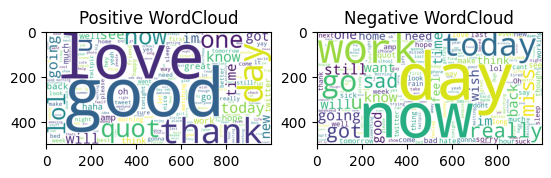

In [20]:
plt.subplot(1, 2, 1)
plt.title('Positive WordCloud')
plt.imshow(pos_wordcloud)
plt.subplot(1, 2, 2)
plt.title('Negative WordCloud')
plt.imshow(neg_wordcloud)
plt.show()